In [1]:
import pandas as pd

df = pd.read_csv('data/dataset.c128210b03b5e528dbf3.csv')
df.head()

,observation_uuid,start_lat,start_lon,start_code_postal,end_lat,end_lon,end_code_postal,rain,heat,day_of_week,hour,minute,fee
0,0d742256-0b36-f3cd-0acf-eba4441030ae,48.8406,2.3220,75014,48.8262,2.3192,75014,2,5,Saturday,13,44,1.69
1,743c7e9d-2fde-b035-2452-bc39dbf2eed1,48.8472,2.3527,75005,48.8337,2.3880,75012,9,3,Tuesday,14,14,1.59
2,43893bc5-449c-56ef-3857-ebe679ffa869,48.9015,2.3704,75019,48.8814,2.3484,75009,1,9,Sunday,14,39,2.19
3,284884a2-55e5-c1d9-b036-4ad9ee5be9b9,48.8504,2.2902,75015,48.8716,2.2811,75016,6,2,Thursday,12,46,1.79
4,a0ce5b5f-ca56-3921-f942-2f1efed97f9e,48.8583,2.3894,75011,48.8623,2.3426,75001,2,6,Friday,13,38,2.09


In [106]:
from datetime import datetime

df['time_str'] = df[['hour', 'minute']].astype(str).apply(':'.join, axis=1)
df['time_obj'] = pd.to_datetime(df['time_obj'])

# plt.hist(df['time_obj'], bins=50)

(array([111.,  82.,  57., 121.,  64., 124., 119.,  78., 107.,  76., 159.,
         84., 134., 127.,  82., 107.,  67.,  41.,  90.,  61.,  98.,  66.,
        143.,  75., 113., 122.,  73., 110.,  71., 104., 108., 119., 106.,
         78., 111.,  50.,  80.,  87., 116., 106.,  68., 111., 103., 118.,
         85., 109., 104.,  98.,  94.,  83.]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
         0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 <BarContainer object of 50 artists>)

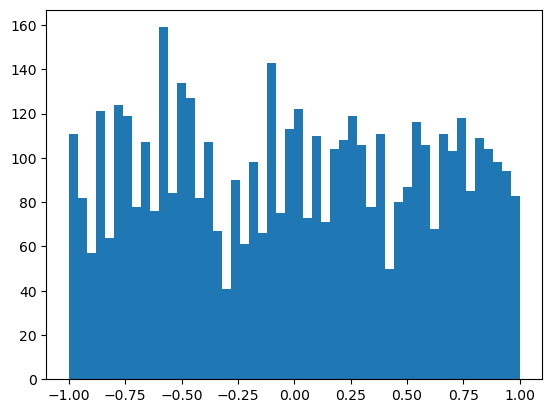

In [115]:

max_a = df['time_obj'].max()
min_a = df['time_obj'].min()
min_norm = -1
max_norm =1
df['time_norm'] = (df['time_obj']- min_a) *(max_norm - min_norm) / (max_a-min_a) + min_norm
df['time_norm']

plt.hist(df['time_norm'], bins=50)

4800


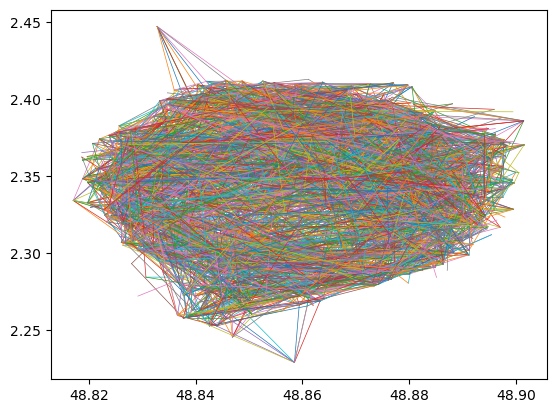

In [65]:
import matplotlib.pyplot as plt

#plt.scatter(x=df['start_lat'], y=df['start_lon'], color='red', s=5)
#plt.scatter(x=df['end_lat'], y=df['end_lon'], color='blue', s=5)

plt.plot()
print(df.shape[0])

for i in range(df.shape[0]):
    plt.plot([df['start_lat'].to_numpy()[i], df['end_lat'].to_numpy()[i]],
             [df['start_lon'].to_numpy()[i], df['end_lon'].to_numpy()[i]],
            linewidth=0.5)

plt.show()

In [109]:
df.describe()

,start_lat,start_lon,start_code_postal,end_lat,end_lon,end_code_postal,rain,heat,hour,minute,fee,distance,time_norm
count,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,48.859372,2.343179,75013.040000,48.859508,2.343550,75012.593750,4.462917,4.387917,12.980833,30.540625,1.936438,2.516343,-0.001222
std,0.020661,0.038938,6.595513,0.019633,0.036029,7.258192,2.867186,2.860430,0.820684,16.728867,0.695627,1.062300,0.579640
min,48.817100,2.229100,75001.000000,48.817100,2.229100,75001.000000,0.000000,0.000000,12.000000,0.000000,0.590000,0.104132,-1.000000
25%,48.843475,2.317050,75010.000000,48.844200,2.316550,75009.000000,2.000000,2.000000,12.000000,17.000000,1.390000,1.721058,-0.519553
50%,48.859400,2.347000,75014.000000,48.860000,2.346800,75013.000000,5.000000,4.000000,13.000000,31.000000,1.890000,2.559579,0.005587
75%,48.876375,2.373525,75017.000000,48.875300,2.372200,75017.000000,7.000000,7.000000,14.000000,45.000000,2.490000,3.323559,0.519553
max,48.901500,2.447300,75116.000000,48.901500,2.447300,75116.000000,9.000000,9.000000,14.000000,59.000000,4.690000,4.918484,1.000000


(array([178., 252., 360., 499., 533., 509., 473., 422., 368., 373., 302.,
        213., 142.,  91.,  36.,  24.,  12.,   5.,   5.,   3.]),
 array([0.59 , 0.795, 1.   , 1.205, 1.41 , 1.615, 1.82 , 2.025, 2.23 ,
        2.435, 2.64 , 2.845, 3.05 , 3.255, 3.46 , 3.665, 3.87 , 4.075,
        4.28 , 4.485, 4.69 ]),
 <BarContainer object of 20 artists>)

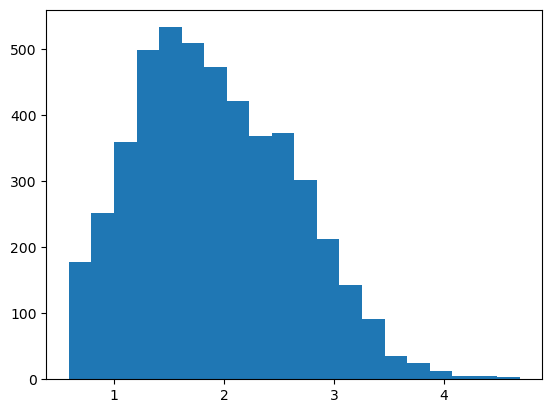

In [113]:
plt.hist(df['fee'], bins=20)

In [99]:
import geopy.distance

df['distance'] = df.apply(lambda x :
    geopy.distance.geodesic((x['start_lat'], x['start_lon']), (x['end_lat'], x['end_lon'])).km, axis=1)

df.head()

,observation_uuid,start_lat,start_lon,start_code_postal,end_lat,end_lon,end_code_postal,rain,heat,day_of_week,hour,minute,fee,distance,time_str,time_obj,NORMA,time_norm
0,0d742256-0b36-f3cd-0acf-eba4441030ae,48.8406,2.3220,75014,48.8262,2.3192,75014,2,5,Saturday,13,44,1.69,1.614514,13:44,1900-01-01 13:44:00,0.162011,0.162011
1,743c7e9d-2fde-b035-2452-bc39dbf2eed1,48.8472,2.3527,75005,48.8337,2.3880,75012,9,3,Tuesday,14,14,1.59,2.994697,14:14,1900-01-01 14:14:00,0.497207,0.497207
2,43893bc5-449c-56ef-3857-ebe679ffa869,48.9015,2.3704,75019,48.8814,2.3484,75009,1,9,Sunday,14,39,2.19,2.756647,14:39,1900-01-01 14:39:00,0.776536,0.776536
3,284884a2-55e5-c1d9-b036-4ad9ee5be9b9,48.8504,2.2902,75015,48.8716,2.2811,75016,6,2,Thursday,12,46,1.79,2.450320,12:46,1900-01-01 12:46:00,-0.486034,-0.486034
4,a0ce5b5f-ca56-3921-f942-2f1efed97f9e,48.8583,2.3894,75011,48.8623,2.3426,75001,2,6,Friday,13,38,2.09,3.462698,13:38,1900-01-01 13:38:00,0.094972,0.094972


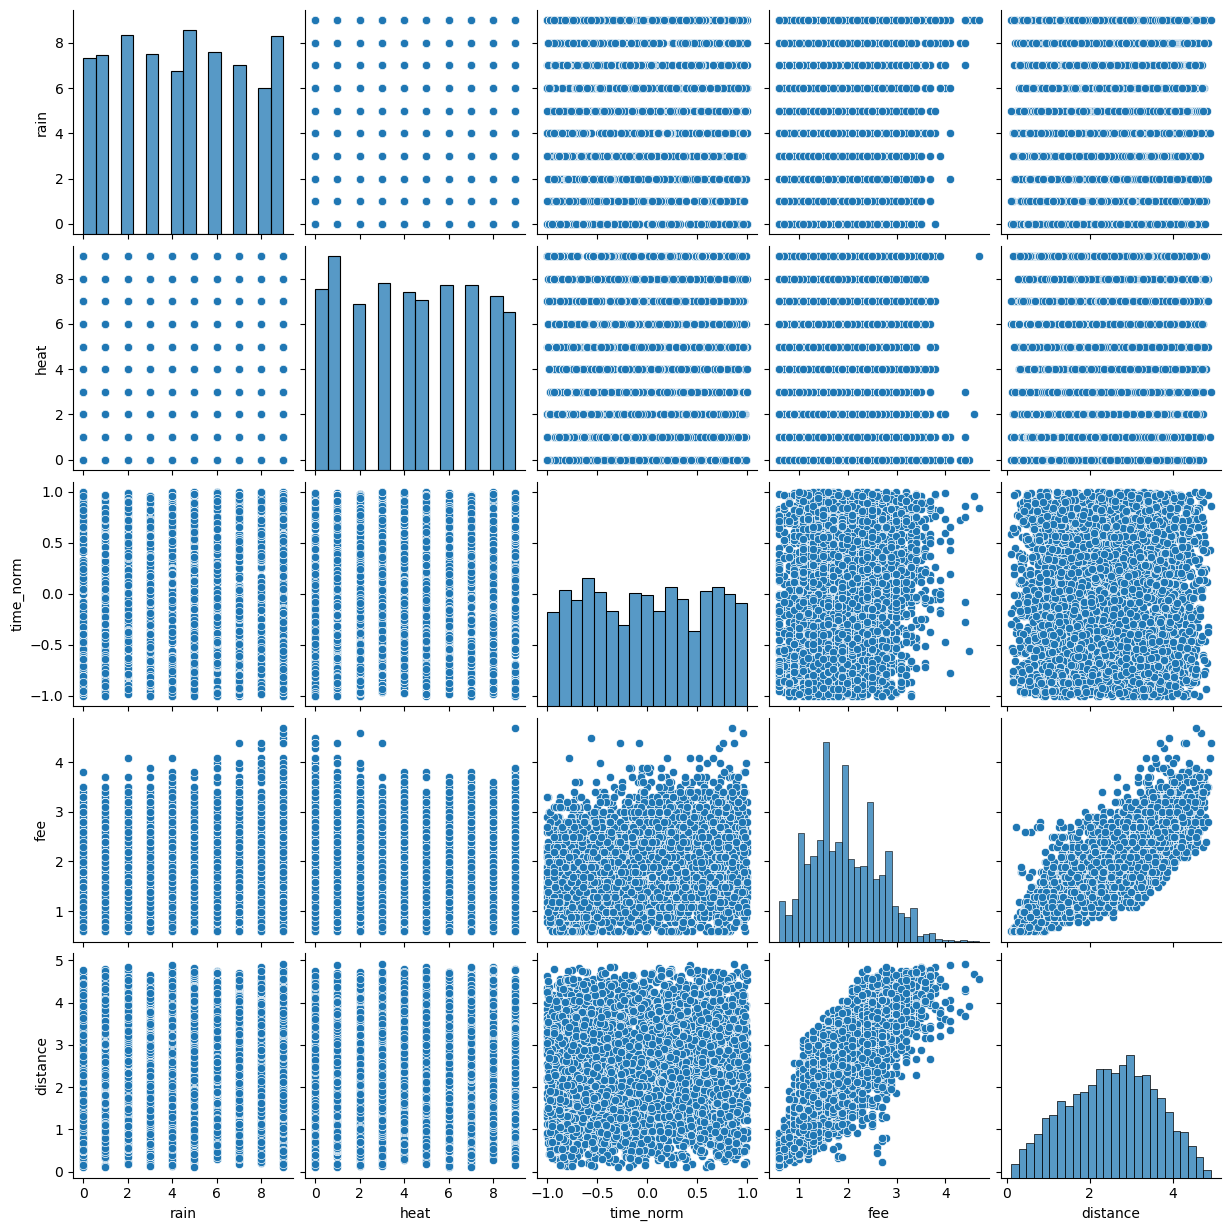

In [116]:
import seaborn as sns
sns.pairplot(df[['rain', 'heat', 'time_norm', 'fee', 'distance']])

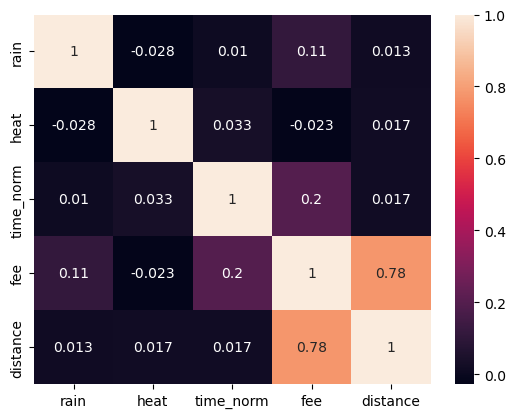

In [117]:
corr_matrix = df[['rain', 'heat', 'time_norm', 'fee', 'distance']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

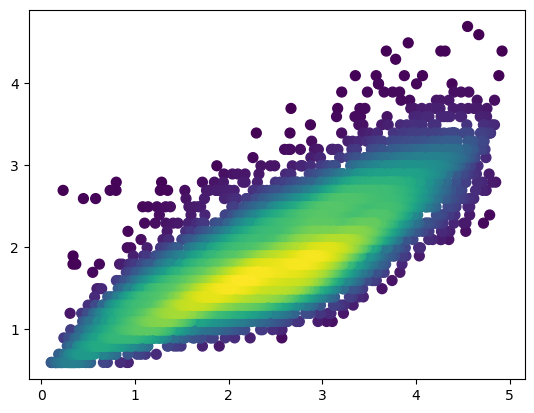

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = df['distance']
y = df['fee']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)
plt.show()

<AxesSubplot: xlabel='distance', ylabel='fee'>

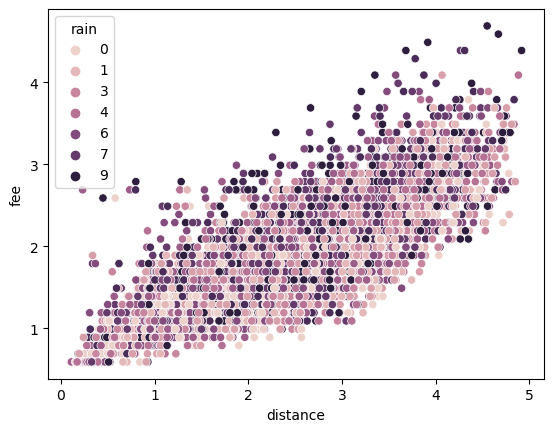

In [119]:
import seaborn as sns
sns.scatterplot(data=df, x='distance', y='fee', hue='rain')

<AxesSubplot: xlabel='distance', ylabel='time_norm'>

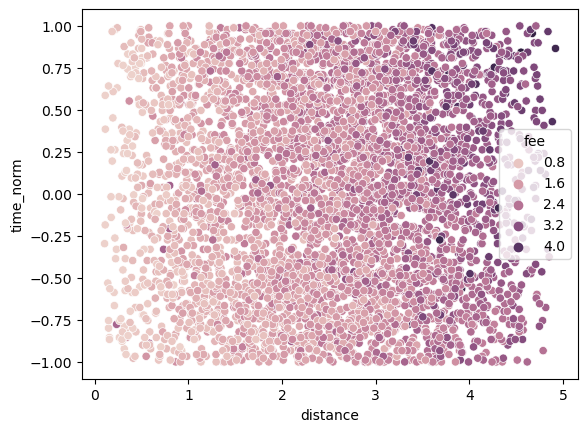

In [105]:
sns.scatterplot(data=df, x='distance', y='time_norm', hue='fee')

Text(0.5, 0, 'hour')

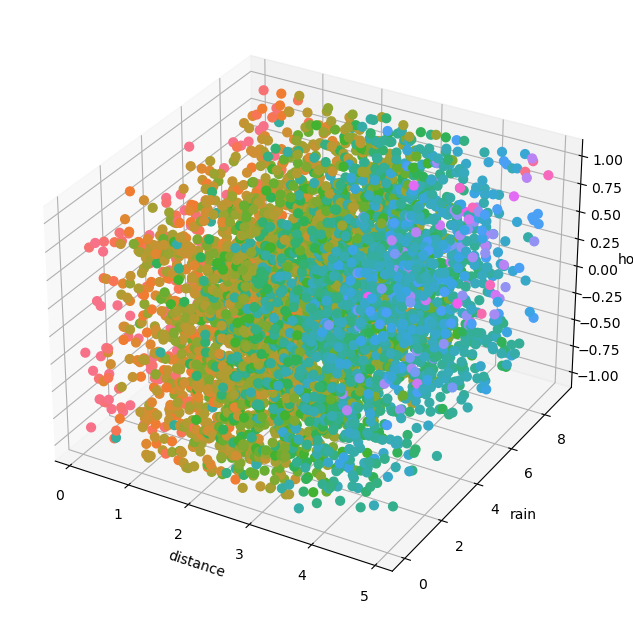

In [103]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(df['distance'], df['rain'], df['time_norm'], s=40, c=df['fee'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('distance')
ax.set_ylabel('rain')
ax.set_zlabel('hour')

In [104]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['day_of_week']])
print(transformed.toarray())

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
